In [75]:
from os.path import splitext
import cv2
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from tensorflow.python.keras import models
import matplotlib.pyplot as plt
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "F://Tesseract-OCR//tesseract.exe"

In [2]:
img_path = '1.jpeg'
model_path = '0207_e500_std_model_4.h5'

In [3]:
model = models.load_model(model_path)

In [73]:
img = cv2.imread(img_path)
show_img = img.copy()
img = resize(img, (768,512), anti_aliasing=True, preserve_range=True)
img = np.expand_dims(img, axis=0)
img = img/255

In [5]:
p = model.predict(img)

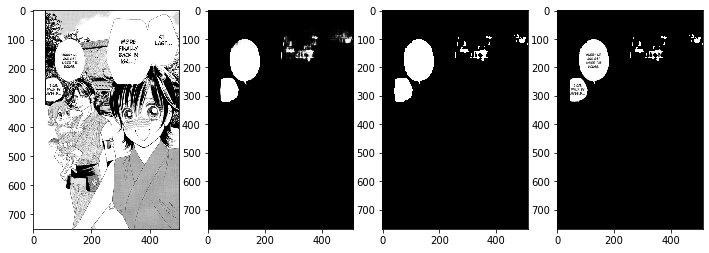

In [74]:
pred_img = p[0,:,:,0]
plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(show_img, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(pred_img, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(np.round(pred_img), cmap='gray')
plt.subplot(1,4,4)
pred_img = np.round(pred_img)
img_gray = cv2.imread("1.jpeg",0)
img_gray = resize(img_gray, (768,512), anti_aliasing=True, preserve_range=True)
speech_img = img_gray * pred_img
plt.imshow(speech_img,cmap='gray')

In [58]:
def hpf(img,r):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    rows, cols = img.shape
    crow,ccol = rows/2 , cols/2
    # create a mask first, center square is 1, remaining all zeros
    mask = np.ones((rows,cols,2),np.uint8)
    mask[int(crow-r):int(crow+r), int(ccol-r):int(ccol+r)] = 0
    # apply mask and inverse DFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

def lpf(img,r):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    rows, cols = img.shape
    crow,ccol = rows/2 , cols/2
    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[int(crow-r):int(crow+r), int(ccol-r):int(ccol+r)] = 1
    # apply mask and inverse DFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

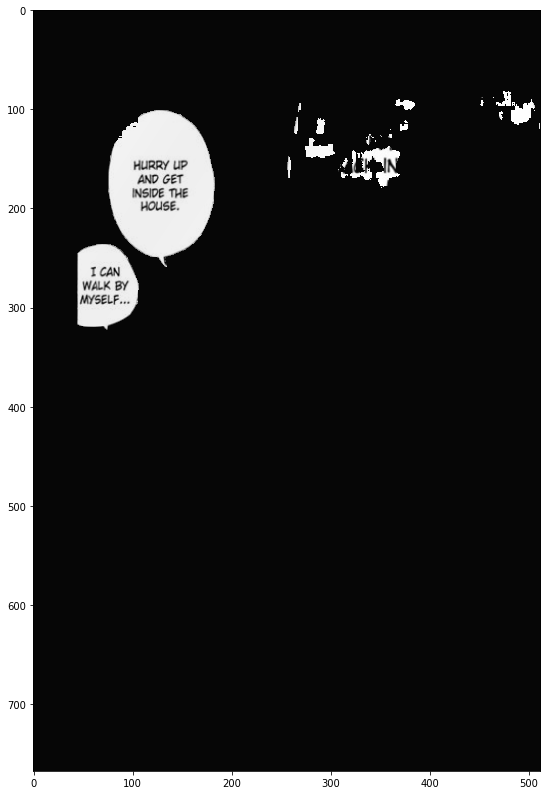

In [93]:
plt.figure(figsize=(10,14))
sharpened_speech_img = hpf(speech_img,0.5)
plt.imshow(sharpened_speech_img,cmap='gray')

In [94]:
imsave('1_speech.jpg',sharpened_speech_img)

Lossy conversion from float32 to uint8. Range [748350.875, 103530096.0]. Convert image to uint8 prior to saving to suppress this warning.


In [95]:
print(pytesseract.image_to_string(Image.open('1_speech.jpg')))

HupRy uP
AND GET
INSIDE THE
HOUSE.


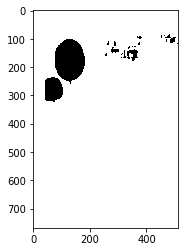

In [101]:
img = cv2.imread('1_pred.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray')